In [1]:
import sys
sys.path.append("..")
import library as lb
import numpy as np
import matplotlib.pyplot as plt

/var/folders/bd/rn8my1zs30g5ml3258f07ft80000gn/T/ipykernel_36529/65747014.py:46: UserWarning: The following kwargs were not used by contour: 'edgecolor'
  ax.contourf(X, Y, Z, cmap='viridis', edgecolor='none')


AttributeError: 'Axes' object has no attribute 'set_zlabel'

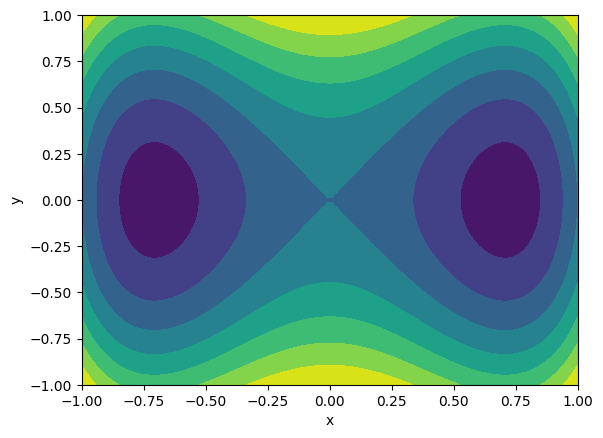

In [10]:
dt = 0.01 # time step
steps = 1000 # number of steps

# Initial conditions
p = np.zeros((steps, 2))
q = np.zeros((steps, 2))

# Parameters of the system
a = 1.0
b = 1.0
c = 0.5

# Initial conditions
p[0] = [0.2, 0.1]
q[0] = [0.75, 0.0]

# Hamiltonian definitions
def V(qx, qy):
    return a*qx**4 - b*qx**2 + c*qy**2

def dHdqx(qx):
    return 4*a*qx**3 - 2*b*qx

def dHdqy(qy):
    return 2*c*qy

def dHdpx(px, m=1.0):
    return px/m

def dHdpy(py, m=1.0):
    return py/m

dHdp = np.array([dHdpx, dHdpy])
dHdq = np.array([dHdqx, dHdqy])

# Plot the potential in 3-dimensional space
fig = plt.figure()
ax = plt.axes()

x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)

X, Y = np.meshgrid(x, y)
Z = V(X, Y)

ax.contourf(X, Y, Z, cmap='viridis', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('V(x,y)')
plt.show()

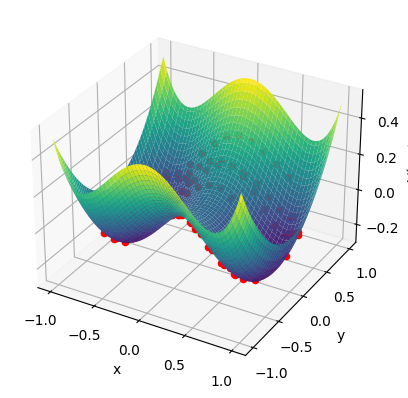

In [7]:
trajectories = [lb.symplectic_euler([np.random.randn()*2-1, np.random.randn()*2-1], [np.random.randn()*2-1, np.random.randn()*2-1], 2, dHdp, dHdq, steps, dt) for _ in range(1)]

# Plot the position p=(x,y) and its momentum total = sqrt(px^2 + py^2) in 3D-dimensional space
fig = plt.figure()
ax = plt.axes(projection='3d')

x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)

X, Y = np.meshgrid(x, y)
Z = V(X, Y)

ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('V(x,y)')

for trajectory in trajectories[0]:
    for x, y in zip(trajectory[:, 0], trajectory[:, 1]):
        if (x**2 + y**2) < 1:
            ax.scatter(x, y, V(x, y), c='r', marker='o')



plt.show()


